In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
#image processing libraries
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

import skimage.data as imgData

In [3]:
def showImage(image):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    
def showImage_cat(image,numCat):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest', cmap=plt.cm.get_cmap('Greens', numCat))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar(ticks=np.arange(numCat))
    plt.show()
    
def showBWImage(image):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest',cmap='gray')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    
def showImage_clim(image, minValue, maxValue):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.clim(minValue,maxValue)
    plt.show()
    
def showImage_autoSize(image):
    %matplotlib inline 

    plt.imshow(image,  aspect='auto', interpolation='none')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.show()

def showImage_autoSize_clim(image, minValue, maxValue):
    %matplotlib inline 

    plt.imshow(image,  aspect='auto', interpolation='none')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.clim(minValue,maxValue)
    plt.show()

In [4]:
image1 = io.imread("dog.png")
image2 = imgData.astronaut()

In [5]:
#get rid of the 4th dimension
image1 = image1[:,:,0:3]

In [6]:
image1 = img_as_float(image1)
image2 = img_as_float(image2)

In [7]:
print image1.shape
print image2.shape

(240L, 320L, 3L)
(512L, 512L, 3L)


In [8]:
segments = slic(image1, 100, 10, sigma=1, enforce_connectivity=True)

In [9]:
outputImage = mark_boundaries(image1,segments)

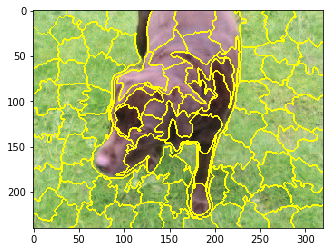

In [12]:
plt.imshow(outputImage)
plt.show()

In [150]:
XDIM = 250
YDIM = 250
ZDIM = 50

numVar = 2
numSeg = 500

In [125]:
raw_data = np.zeros((numVar,ZDIM,YDIM,XDIM))

temp_data = np.fromfile("../../data/isabel_MV_t20/Pf20.binLE.raw_corrected_2_subsampled", dtype=np.float32)
raw_data[0] = temp_data.reshape((ZDIM,YDIM,XDIM))

temp_data = np.fromfile("../../data/isabel_MV_t20/Velocityf20.binLE.raw_corrected_2_subsampled", dtype=np.float32)
raw_data[1] = temp_data.reshape((ZDIM,YDIM,XDIM))

In [126]:
#currently working with 2d data in python for visualization
#store the extracted slices in separate array
raw_slice = np.zeros((numVar, YDIM,XDIM))
raw_slice[0] = raw_data[0][10]
raw_slice[1] = raw_data[1][10]

In [127]:
raw_slice_T = np.transpose(raw_slice)

In [128]:
raw_slice_T.shape

(250L, 250L, 2L)

In [129]:
#normalize the varaible values
pressure_slice_max = np.max(raw_slice[0].flatten())
pressure_slice_min = np.min(raw_slice[0].flatten())

velocity_slice_max = np.max(raw_slice[1].flatten())
velocity_slice_min = np.min(raw_slice[1].flatten())

print pressure_slice_max,pressure_slice_min
print velocity_slice_max,velocity_slice_min

norm_raw_slice_T = np.zeros((YDIM,XDIM,numVar))
#pressure variable
for i in range(0,YDIM):
    for j in range(0,XDIM):
        norm_raw_slice_T[i][j][0] = (raw_slice_T[i][j][0] - pressure_slice_min)/(pressure_slice_max - pressure_slice_min)

#velocity variable
for i in range(0,YDIM):
    for j in range(0,XDIM):
        norm_raw_slice_T[i][j][1] = (raw_slice_T[i][j][1] - velocity_slice_min)/(velocity_slice_max - velocity_slice_min)



1832.21374512 -3150.03466797
62.8778839111 0.0354437939823


In [130]:
#rescale to 0-255
rescale_raw_slice_T = np.zeros((YDIM,XDIM,numVar))
rescale_raw_slice_T = norm_raw_slice_T * 255

In [131]:
def show_partition(seg):
    #create a dummy image
    dummy = np.zeros((YDIM,XDIM))
    seg_Image = mark_boundaries(dummy,seg)
    print seg.shape
    plt.imshow(seg_Image)
    plt.gca().invert_yaxis()
    plt.show()
    
    
    

In [151]:
PV_segments0 = slic(rescale_raw_slice_T[:,:,0], numSeg, 10, sigma=2, enforce_connectivity=True)
PV_segments1 = slic(rescale_raw_slice_T[:,:,1], numSeg, 10, sigma=2, enforce_connectivity=True)
PV_segments2 = slic(rescale_raw_slice_T, numSeg, 10, sigma=2, enforce_connectivity=True)

(250L, 250L)


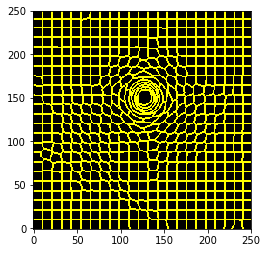

(250L, 250L)


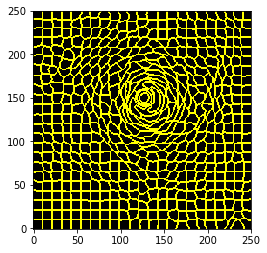

(250L, 250L)


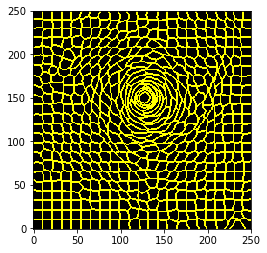

In [152]:
show_partition(PV_segments0)
show_partition(PV_segments1)
show_partition(PV_segments2)

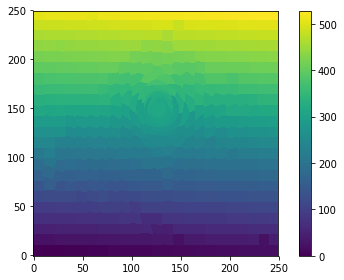

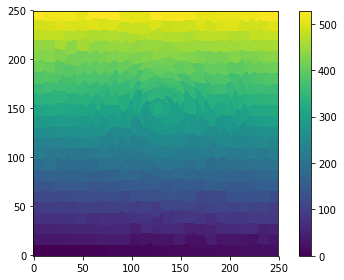

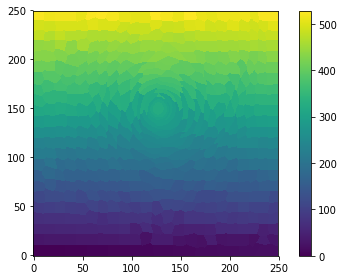

In [153]:
showImage(PV_segments0)
showImage(PV_segments1)
showImage(PV_segments2)

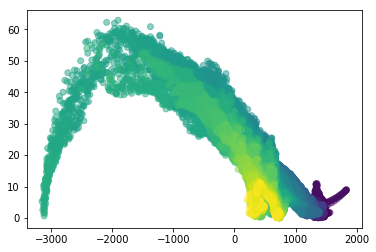

In [154]:
#scatter plot of the MV with categories
fig, ax = plt.subplots()
        
plt.scatter(raw_slice_T[:,:,0].flatten(), raw_slice_T[:,:,1].flatten(), c=PV_segments2.flatten(), label=PV_segments2.flatten(), alpha=0.5)
#plt.legend()
plt.show()

In [155]:
print np.min(PV_segments2)
print np.max(PV_segments2)

0
528


In [156]:
numSegFinal = np.max(PV_segments2)+1
segmentCount = np.zeros((numSegFinal))
for s in range(0,numSegFinal):
    for y in range(0,YDIM):
        for x in range(0,XDIM):
            if PV_segments2[y][x] == float(s):
                segmentCount[s] += 1

print segmentCount
print np.mean(segmentCount)

[ 121.  121.  121.  121.  121.  121.  121.  121.  121.  128.  136.  106.
  121.  109.  120.  103.  122.  102.  128.  129.   84.  114.  111.  128.
  111.  134.  132.  121.  119.  132.  130.  100.  121.  121.  121.  121.
  121.  121.  126.  122.  127.  107.  127.  124.  105.   86.  136.  131.
  136.  102.  124.  130.  128.  112.  121.  121.  121.  121.  121.  127.
  104.  121.  121.  133.  138.  124.  116.  129.  109.  128.  134.  147.
  122.  121.  121.  115.   96.  138.  138.  129.  112.  115.  144.  136.
  137.  123.  116.  129.  114.  101.  124.  114.  142.  131.  115.  127.
  116.   97.  120.  126.  128.  109.  120.  108.  120.  113.  113.  109.
  115.  125.  107.  105.  110.  118.  125.  132.  137.  116.  126.  136.
  119.   99.  107.  118.  132.  114.  102.  119.  115.  118.  115.  110.
  117.  116.  114.  123.  112.  115.  135.  123.  112.  119.  113.  109.
  119.  126.  132.  119.  122.  128.  111.  132.  119.  112.  118.  113.
  122.   89.  129.  117.  143.  117.  137.  121.  1

In [157]:
from scipy import stats
from scipy.stats import norm
import sys
import math

In [158]:
#store distributions per segment in the data i.e, numSeg

numSegFinal = np.max(PV_segments2)+1

#First: store the gaussian distribution per segment
ds_Gaussian = np.zeros((numVar,numSegFinal,2))


for s in range(0,numSegFinal):
    for v in range(0,numVar):
        valList = []
        for y in range(0,YDIM):
            for x in range(0,XDIM):
                if PV_segments2[y][x] == float(s):
                    valList.append(raw_slice[v][y][x])
        valArray = np.array(valList)
        ds_Gaussian[v][s][0] = np.mean(valArray)
        ds_Gaussian[v][s][1] = np.std(valArray)
        
                
            

In [159]:
#Second:store the correlation per segment
ds_correl = np.zeros((numSegFinal))
for s in range(0,numSegFinal):
    p_valList = []
    v_valList = []
    for y in range(0,YDIM):
        for x in range(0,XDIM):
            if PV_segments2[y][x] == float(s):
                p_valList.append(raw_slice[0][y][x])
                v_valList.append(raw_slice[1][y][x])
    ds_correl[s] = stats.pearsonr(p_valList,v_valList)[0]
                
                

In [160]:
#Third: store the histogram per segment
ds_Hist_cdf = np.zeros((numVar,numSegFinal,32))
ds_Hist_binEdges = np.zeros((numVar,numSegFinal,33))


for s in range(0,numSegFinal):
    for v in range(0,numVar):
        valList = []
        for y in range(0,YDIM):
            for x in range(0,XDIM):
                if PV_segments2[y][x] == float(s):
                    valList.append(raw_slice[v][y][x])
        valArray = np.array(valList)
        
        hist0, bin_edges0 = np.histogram(valList, density=True, bins=32)
        cdf0 = np.cumsum(hist0*np.diff(bin_edges0))
        
        ds_Hist_cdf[v][s] = cdf0
        ds_Hist_binEdges[v][s] = bin_edges0
        

In [161]:
#reconstruction using mote-carlo sampling : only Gaussian
recon_data0 = np.zeros(((numVar, YDIM,XDIM)))

p_reconValList0 = []
v_reconValList0 = []

for s in range(0,numSegFinal):
    correl_matrix = np.zeros((numVar,numVar))
    seg_correl = ds_correl[s]
    correl_matrix[0][0] = 1.0
    correl_matrix[0][1] = seg_correl
    correl_matrix[1][0] = 1.0
    correl_matrix[1][1] = seg_correl
    
    mean_vector = np.zeros((numVar)) #standard normals have 0 mean
    
    sampledata = np.random.multivariate_normal(mean_vector, correl_matrix, 10*int(segmentCount[s]))
    uData = norm.cdf(sampledata)
    
    MVsamples = np.zeros((10*int(segmentCount[s]),numVar))
    for k in range(0,10*int(segmentCount[s])):
        MVsamples[k][0] = stats.norm.ppf(q=uData[k,0],loc=ds_Gaussian[0][s][0],scale=ds_Gaussian[0][s][1])
        MVsamples[k][1] = stats.norm.ppf(q=uData[k,1],loc=ds_Gaussian[1][s][0],scale=ds_Gaussian[1][s][1])
    
    #MVsamples1 = np.zeros((int(segmentCount[s]),numVar))
    MV_sample_list_p = []
    MV_sample_list_v = []
    for k in range(0,int(segmentCount[s])):
        t_sum0 = 0.0
        t_sum1 = 0.0
        for l in range(0,10):
            t_sum0 += MVsamples[k*10+l][0]
            t_sum1 += MVsamples[k*10+l][1]
        MV_sample_list_p.append(t_sum0/10.0)
        MV_sample_list_v.append(t_sum1/10.0)
    
    p_reconValList0.append(MV_sample_list_p)
    v_reconValList0.append(MV_sample_list_v)

    print "[" + str(s) + "]" 

                                

[0]


C:\Users\hsubhashis\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]
[185

In [162]:
#now plug-in the samples into the reconstructed field 

segCounter = np.zeros((numSegFinal))
for s in range(0,numSegFinal):
    segCounter[s] = segmentCount[s]


for y in range(0,YDIM):
    for x in range(0,XDIM):
        s = int(PV_segments2[y][x])
        sample_idx = int(segCounter[s]-1)
        recon_data0[0][y][x] = p_reconValList0[s][sample_idx]
        recon_data0[1][y][x] = v_reconValList0[s][sample_idx]
        segCounter[s] -= 1
        
print segCounter        

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [163]:
len(v_reconValList0[0])

121

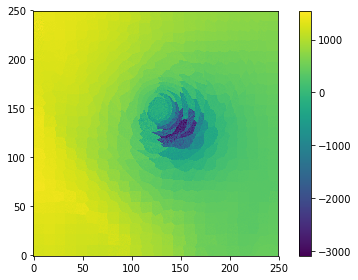

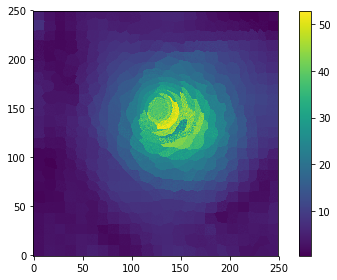

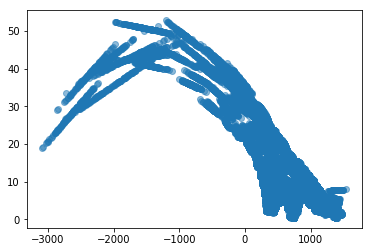

In [164]:
showImage(recon_data0[0])
showImage(recon_data0[1])
#scatter plot of the MV
plt.scatter(recon_data0[0].flatten(), recon_data0[1].flatten(), alpha=0.5)
plt.show()

In [165]:
def inverseCDFofHistogram(support, cdfValue, unifValue):
    maxCDF = max(cdfValue)
    minCDF = min(cdfValue)
    #print maxCDF
    #print minCDF
    if unifValue > maxCDF or unifValue < minCDF:
        if unifValue > maxCDF:
            unifValue = maxCDF
        if unifValue < minCDF:
            unifValue = minCDF
        
    if unifValue > maxCDF or unifValue < minCDF:
        #print unifValue
        raise ValueError('A very specific bad thing happened')
        return -1000
    else:
        l = support.shape
        for i in range(0,l[0]):
            if unifValue >= cdfValue[i] and unifValue <= cdfValue[i+1]:
                left = i;
                right = i+1;
                ratio = (unifValue-cdfValue[i])/(cdfValue[i+1]-cdfValue[i])
                value = ratio * (support[i+1]-support[i]) + support[i]
                return value

In [166]:
#reconstruction using mote-carlo sampling : only histogram
recon_data1 = np.zeros(((numVar, YDIM,XDIM)))

p_reconValList1 = []
v_reconValList1 = []

for s in range(0,numSegFinal):
    correl_matrix = np.zeros((numVar,numVar))
    seg_correl = ds_correl[s]
    correl_matrix[0][0] = 1.0
    correl_matrix[0][1] = seg_correl
    correl_matrix[1][0] = 1.0
    correl_matrix[1][1] = seg_correl
    
    mean_vector = np.zeros((numVar)) #standard normals have 0 mean
    
    sampledata = np.random.multivariate_normal(mean_vector, correl_matrix, 10*int(segmentCount[s]))
    uData = norm.cdf(sampledata)
    
    MVsamples = np.zeros((10*int(segmentCount[s]),numVar))
    for k in range(0,10*int(segmentCount[s])):
        MVsamples[k][0] = inverseCDFofHistogram(ds_Hist_binEdges[0][s], ds_Hist_cdf[0][s], uData[k,0])
        MVsamples[k][1] = inverseCDFofHistogram(ds_Hist_binEdges[1][s], ds_Hist_cdf[1][s], uData[k,1])
    
    #MVsamples1 = np.zeros((int(segmentCount[s]),numVar))
    MV_sample_list_p = []
    MV_sample_list_v = []
    for k in range(0,int(segmentCount[s])):
        t_sum0 = 0.0
        t_sum1 = 0.0
        for l in range(0,10):
            t_sum0 += MVsamples[k*10+l][0]
            t_sum1 += MVsamples[k*10+l][1]
        MV_sample_list_p.append(t_sum0/10.0)
        MV_sample_list_v.append(t_sum1/10.0)
    
    p_reconValList1.append(MV_sample_list_p)
    v_reconValList1.append(MV_sample_list_v)

    print "[" + str(s) + "]" 

                                

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]


C:\Users\hsubhashis\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\hsubhashis\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]
[185]
[186]
[187]
[188]
[189]
[1

In [167]:
#now plug-in the samples into the reconstructed field 

segCounter = np.zeros((numSegFinal))
for s in range(0,numSegFinal):
    segCounter[s] = segmentCount[s]


for y in range(0,YDIM):
    for x in range(0,XDIM):
        s = int(PV_segments2[y][x])
        sample_idx = int(segCounter[s]-1)
        recon_data1[0][y][x] = p_reconValList1[s][sample_idx]
        recon_data1[1][y][x] = v_reconValList1[s][sample_idx]
        segCounter[s] -= 1
        
print segCounter        

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [169]:
def handleNAN(d):
    
    new_d = np.zeros((numVar,YDIM,XDIM))
    for i in range(0,YDIM):
        for j in range(0,XDIM):
            new_d[0][i][j] = d[0][i][j]
            new_d[1][i][j] = d[1][i][j]
    nan_c = 0
    for i in range(0,YDIM):
        for j in range(0,XDIM):
            if math.isnan(new_d[0][i][j]):
                s = int(PV_segments2[i][j])
                new_d[0][i][j] = ds_Gaussian[0][s][0]
            if math.isnan(new_d[1][i][j]):
                s = int(PV_segments2[i][j])
                new_d[1][i][j] = ds_Gaussian[1][s][0]
    return new_d

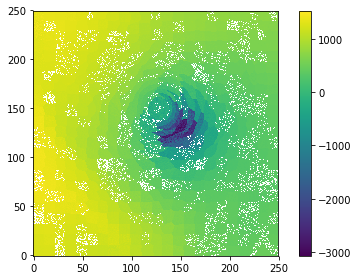

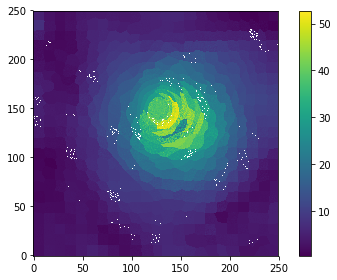

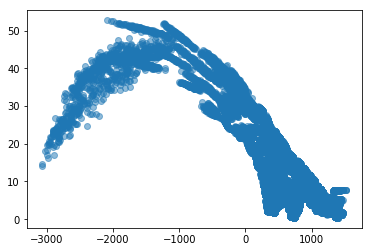

In [168]:
showImage(recon_data1[0])
showImage(recon_data1[1])
#scatter plot of the MV
plt.scatter(recon_data1[0].flatten(), recon_data1[1].flatten(), alpha=0.5)
plt.show()

In [170]:
new_recon_data1 = handleNAN(recon_data1)

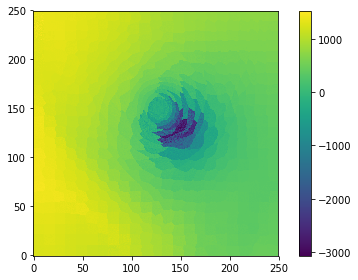

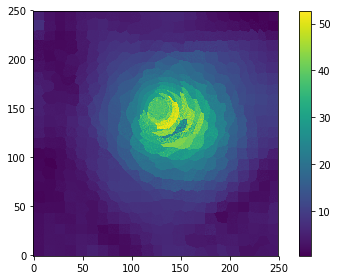

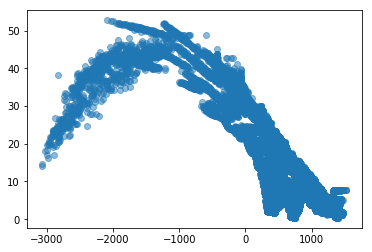

In [171]:
showImage(new_recon_data1[0])
showImage(new_recon_data1[1])
#scatter plot of the MV
plt.scatter(new_recon_data1[0].flatten(), new_recon_data1[1].flatten(), alpha=0.5)
plt.show()